In [1]:
import requests
import pandas as pd
import os
from bs4 import BeautifulSoup

In [4]:
# response = requests.get('https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md')

# soup = BeautifulSoup(response.content, "html.parser")

# rows = soup.find('tbody').find_all('tr')
# rows = [row.find_all('td') for row in rows]

# df = pd.DataFrame([*map(lambda z: {
#     "link": z[0].find('a')['href'],
#     "name": z[0].text,
#     "type": z[3].text
# }, rows)])

# df['link'] = df["link"].apply(lambda z: z.replace('\\"', ''))

# df.to_csv('models.csv', index=False)

# df = pd.read_csv("validation.csv")
# for _,item in df.iterrows():
#     if not os.path.exists(item["image"]):
#         print(item["image"])

In [1]:
import cv2
import numpy as np
from skimage.metrics import mean_squared_error, structural_similarity
from PIL import Image
import matplotlib.pyplot as plt
import imagehash
import re

In [ ]:
%cd ..

In [6]:
regex = re.compile(r"^\d+")
IM1 = 'bricks/3004 brick 1x2/3004 brick 1x2 067L.jpg'
IM2 = 'bricks/3005 brick 1x1/3005 brick 1x1 249R.jpg' #'bricks/2357 brick corner 1x2x2/2357 brick corner 1x2x2 023L.jpg'

img1 = cv2.imread(IM1)
img2 = cv2.imread(IM2)

c1 = regex.match(IM1.split("/")[-1]).group(0)
c2 = regex.match(IM2.split("/")[-1]).group(0)

In [7]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [8]:
cv2.matchTemplate(img1_gray, img2_gray, cv2.TM_CCORR_NORMED).max()

0.74811834

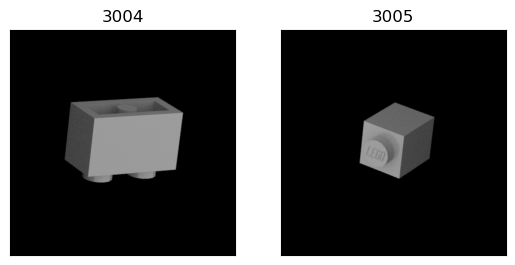

In [9]:
f, axarr = plt.subplots(1,2)
axarr[0].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
axarr[0].set_title(c1)
axarr[0].imshow(img1)
axarr[1].tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
axarr[1].set_title(c2)
axarr[1].imshow(img2)

plt.show()

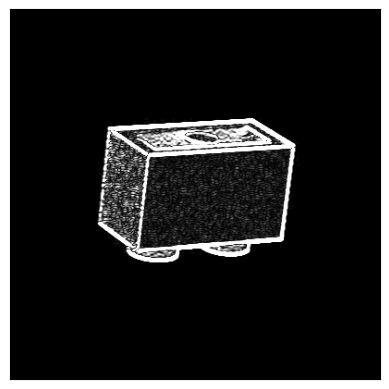

In [10]:
#blurred = cv2.GaussianBlur(img1_gray, (3,3), sigmaX=0, sigmaY=0)
borders = cv2.Sobel(img1_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
borders = cv2.convertScaleAbs(borders)
borders = cv2.cvtColor(borders, cv2.COLOR_GRAY2BGR)
plt.xticks([])
plt.yticks([])
plt.imshow(borders)

MSE value: 1330.41224375


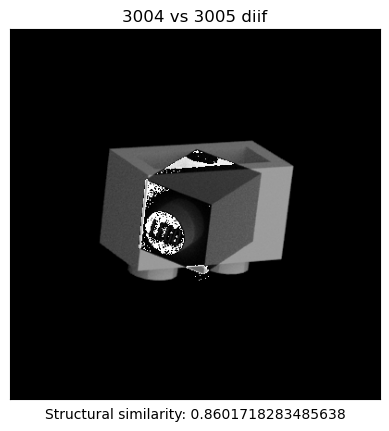

In [11]:
mse = mean_squared_error(img1_gray, img2_gray)
print("MSE value:", mse)
diff = np.abs(img1_gray - img2_gray)
diff = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)

plt.xticks([])
plt.yticks([])
plt.title(f'{c1} vs {c2} diif')
similarity, _ = structural_similarity(img1_gray, img2_gray, full=True)
plt.text(200, 420, f"Structural similarity: {similarity}", horizontalalignment="center")

plt.imshow(diff)